In [8]:
import pandas as pd
import numpy as np
from scipy.optimize import newton

# Define the polynomial equation coefficients
coefficients = [0.8432, -53.176, 1195.8, -11481, 44388]

# Define the polynomial equation function
def polynomial_equation(x):
    return np.polyval(coefficients, x)

# Function to find root using scipy's newton method
def find_root(y):
    return newton(lambda x: polynomial_equation(x) - y, x0=0)

# Read data from CSV into a DataFrame
df = pd.read_csv('FSR14_V2.csv')  # Replace with your actual CSV file path

# Iterate through each row and compute FSR14_New
FSR14_values = df['FSR14']

FSR14_new_values = []
for y in FSR14_values:
    x_solution = find_root(y)
    FSR14_new_values.append(x_solution)

# Add FSR14_New column to the DataFrame
df['FSR14_New'] = FSR14_new_values

# Save the updated DataFrame to a new CSV file
df.to_csv('newFSRvals.csv', index=False)

print("New FSR14 values saved to newFSRvals.csv")

New FSR14 values saved to newFSRvals.csv


In [13]:
import pandas as pd

# Load the CSV file
csv_data = pd.read_csv('newFSRvals.csv')

# Multiply every value in the Time column by 1000
csv_data['Time'] = csv_data['Time']
csv_data['FSR14_New'] = csv_data['FSR14_New']/0.1824
# Write the modified data back to the same CSV file
csv_data.to_csv('newFSRvals.csv', index=False)


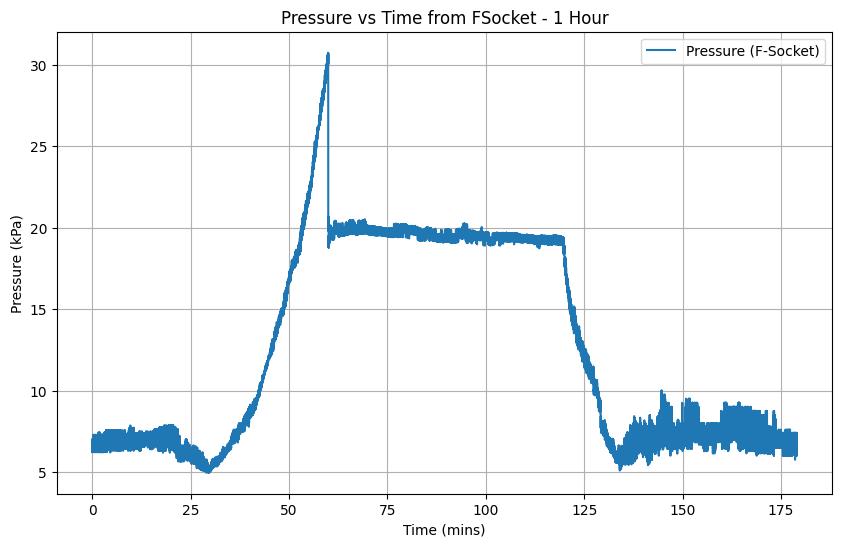

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_data = pd.read_csv('newFSRvals.csv')

# Load the TXT file with comma-separated values
txt_data = pd.read_csv('update_2024_06_28 1-hr 45 ml 14-15.txt', 
                       sep=',', 
                       header=0, 
                       names=['Time', 'Pressure', 'Max'])

#csv_data2 = pd.read_csv('extracted_Fsr_Fsocket_pair.csv')

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot CSV data
#plt.plot(csv_data['Time'], csv_data['FSR14_New'], label='Pressure (FSR 14)')

# Plot TXT data
plt.plot(txt_data['Time'], txt_data['Pressure'], label='Pressure (F-Socket)')

# Add labels and title
plt.xlabel('Time (mins)')
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs Time from FSocket - 1 Hour')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [6]:
import pandas as pd

# Define the input and output file paths
input_file_path = '2024_06_26 1 - min 45 ml 14-15 no drop.csv'
output_file_path = 'extracted_Fsr_Fsocket_pair.csv'

# Read the CSV file
data = pd.read_csv(input_file_path, header=None)

# Initialize lists to store frame numbers and cell values
frame_numbers = []
cell_values = []

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    if row[0].startswith('Frame'):
        # Extract frame number
        frame_number = (int(row[0].split()[1]))*(1000/8)
        frame_numbers.append(frame_number)
        # Extract the value from the 15th row and 5th column of the next frame
        cell_value = data.iloc[index + 14, 4]
        cell_values.append(cell_value)

# Create a DataFrame with the extracted values
extracted_data = pd.DataFrame({
    'Frame Number': frame_numbers,
    'Cell Value': cell_values
})

# Write the extracted values to the output CSV file
extracted_data.to_csv(output_file_path, index=False)

print("Extraction complete. Check the output file for results.")

Extraction complete. Check the output file for results.
